In [1]:
import pandas as pd

rfm = pd.read_csv('rfm_metrics.csv')
rfm.head()

,clientid,recency,frequency,monetaryvalue,avgtransactionvalue
0,00018c3f-5f99-4f68-a78a-016985759872,170,7,8821.68,1260.24
1,000a5e19-8ebf-4d40-924d-d209e2526223,67,12,9986.68,832.22
2,000b1f18-a74f-4e5f-9a94-d809ad51cc03,31,4,2416.13,604.03
3,0037c351-6d1c-4390-87d9-95c7a92c87dd,21,7,7009.02,1001.29
4,005e3c87-0c61-4077-8550-25ce1a71de7e,39,11,6371.56,579.23


In [3]:
transactions_df = pd.read_csv('clean_transactions.csv')
reviews_df = pd.read_csv('clean_reviews.csv')

In [4]:
transactions_df.head()

,transactionid,clientid,product,price,quantity,total,transactiondate,paymentmethod,name,age,gender,country,loyalty,brand,reviewscount,stars,category,total_spend,avg_price
0,7bcdc120-0cf3-4125-9dc1-29ab9d59ca9f,5f82378d-281a-4033-89f3-23ec989dea6c,Philips X-tremeVision Pro150 HIR2 car headligh...,93.86,5,469.30,2023-11-19,PayPal,Michael King,63,Male,Canada,New,PHILIPS,16632.0,4.4,electronics,1425.70,214.650
1,464ac02a-a283-4948-a5bc-35c3af362655,5f82378d-281a-4033-89f3-23ec989dea6c,Chocolate Box Bundle with Maltesers 110g (3 Pack),143.78,1,143.78,2023-12-26,Debit Card,Michael King,63,Male,Canada,New,Generic,11.0,3.7,grocery,1425.70,214.650
2,3523b286-a030-49fd-b0a1-67de3d9d7acb,5f82378d-281a-4033-89f3-23ec989dea6c,"Microsoft Surface Laptop SE 29.5 cm (11.6"") HD...",406.31,2,812.62,2024-03-03,Cash,Michael King,63,Male,Canada,New,Microsoft,1.0,1.0,electronics,1425.70,214.650
3,7ac30256-43a5-408e-9d2a-9aa9199aac09,c9ae74b5-c664-4646-b478-518069ee041f,Nature Valley Crunchy Oats and Chocolate Cerea...,12.58,5,62.90,2024-08-07,Debit Card,Mallory Morris,21,Male,USA,New,Nature Valley,10083.0,4.6,grocery,2412.94,232.975
4,c9161fc7-92ab-4a5a-841b-c00aeab60927,c9ae74b5-c664-4646-b478-518069ee041f,"Mars Caramel, Nougat & Milk Chocolate Snack Ba...",89.19,4,356.76,2024-06-27,PayPal,Mallory Morris,21,Male,USA,New,Mars,1337.0,4.6,grocery,2412.94,232.975


In [5]:
reviews_df.head()

,username,location,date,content,rating,category,sentiment_score
0,Anna Burrows,US,2025-01-18 09:24:37.212047,keeping me safer than before from all…keeping...,5,electronics,0.000000
1,Kellie Garris,US,2025-01-19 08:47:37.401992,TotalAV well done!I've been using TotalAV for ...,5,electronics,0.417361
2,Mathew Moore,CA,2025-01-18 15:24:37.497909,This is my favourite antivirus I have…This is ...,5,electronics,0.223052
3,Donald Anjal,US,2025-01-17 09:24:37.512342,IT WILL BE GREAT IF YOU RESUBMIT YOUR…IT WILL ...,5,electronics,0.508929
4,Norman L. Mitchell Sr.,US,2025-01-16 09:24:37.518661,Great Customer ServiceYour consent notices to ...,5,electronics,0.466667


In [6]:
from scipy.stats import skew, kurtosis
# performing skewness and kurtosis test for all numerical columns in rfm df
numeric_columns = ['recency', 'frequency', 'monetaryvalue', 'avgtransactionvalue']

for col in numeric_columns:
    col_skewness = skew(rfm[col])
    col_kurtosis = kurtosis(rfm[col], fisher=True)  # fisher=True gives excess kurtosis
    print(f"{col}: Skewness = {col_skewness:.2f}, Kurtosis = {col_kurtosis:.2f}")

recency: Skewness = 1.79, Kurtosis = 3.14
frequency: Skewness = 0.15, Kurtosis = -0.98
monetaryvalue: Skewness = 0.48, Kurtosis = -0.33
avgtransactionvalue: Skewness = 0.86, Kurtosis = 2.68


we can see highly skewed data in recency and transaction values, so I need to handle it before plotting

In [7]:
import numpy as np # handling high skewness
rfm['recency_log'] = np.log1p(rfm['recency'])
rfm['avg_transaction_log'] = np.log1p(rfm['avgtransactionvalue'])

In [8]:
for col in ['recency_log', 'avg_transaction_log']:
    print(f"{col}: Skewness = {skew(rfm[col]):.2f}, Kurtosis = {kurtosis(rfm[col], fisher=True):.2f}")

recency_log: Skewness = -0.66, Kurtosis = 0.35
avg_transaction_log: Skewness = -1.64, Kurtosis = 7.31


now it's alright for plotting

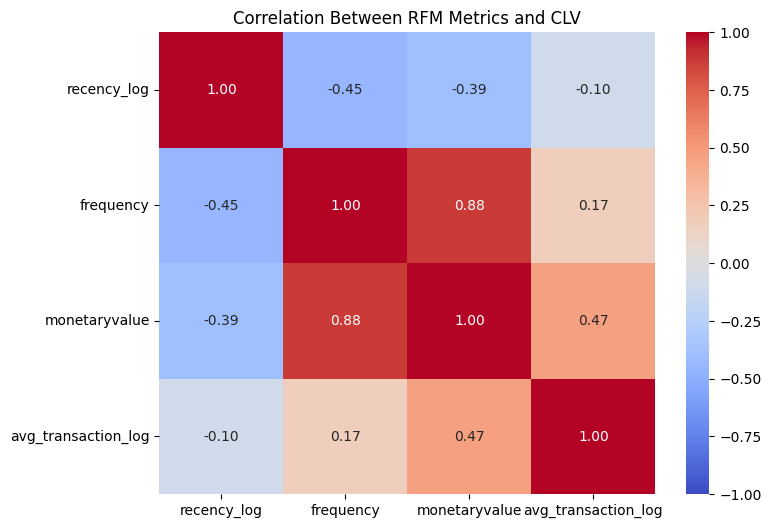

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
# Selecting numeric columns for matrix
numeric_columns = rfm[['recency_log', 'frequency','monetaryvalue','avg_transaction_log']]
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Between RFM Metrics and CLV')
plt.show()

here we can see high correlation between monetaryvalue anf frequency - wich means the more transaction customer make, the more total value he has. Positive correlation between monetary value and avg transaction value means, that client spending more total with higher avg purchase. also there is a negative correlation between recency and frequency, which means the lower the transaction frequency, the more likely it is that hte customer has not made any purchases for a long time

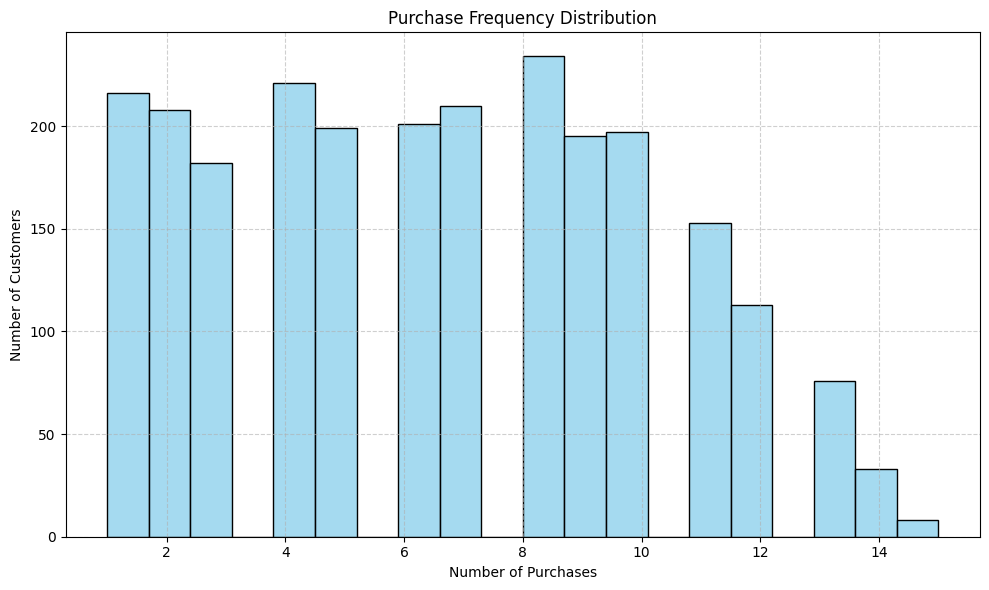

In [11]:
# frequency of purchases
plt.figure(figsize=(10, 6))
sns.histplot(rfm['frequency'], bins=20, kde=False, color='skyblue')
plt.title('Purchase Frequency Distribution')
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

the best choise is to concentrate our atttention to customers which made 8+ purchases in total, and also customers that made 14+ purchases - the highest frequency

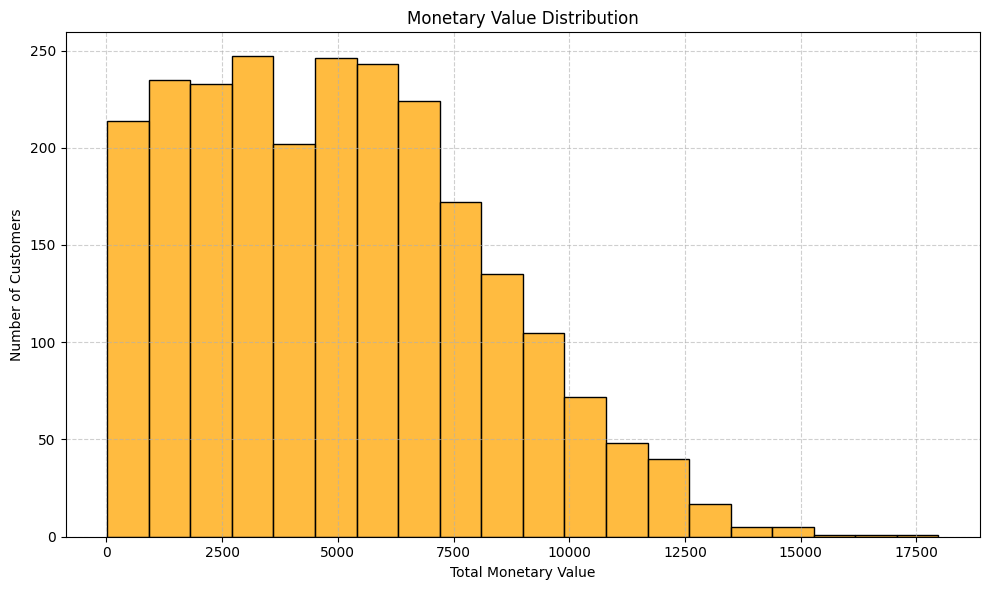

In [12]:
# average $ amount spent by customer
plt.figure(figsize=(10, 6))
sns.histplot(rfm['monetaryvalue'], bins=20, kde=False, color='orange')
plt.title('Monetary Value Distribution')
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.xlabel('Total Monetary Value')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

here we can see that a small amount of customers giving us a best total revenue (from 10k to 18k)
most likely these are customers who make purchases frequently and have an above average avg purchase value


In [13]:
# Average Transaction Value
import plotly.express as px
fig = px.histogram(
    rfm,
    x='avg_transaction_log',
    nbins=30,
    title='Average Transaction Value Distribution',
    labels={'avg_transaction_log': 'Avg Transaction Value'},
    color_discrete_sequence=['coral']
)

fig.update_layout(
    xaxis_title='Avg Transaction Value',
    yaxis_title='Number of Customers',
    template='plotly',
    bargap=0.1
)

fig.show()

most of customers made from 6 to 7 transactions in total, therefore, promotional campaings are needed for clients who made fewer transactions, as well as supporting intresting ones who make more then average

In [14]:
# short product name for better plotting
transactions_df['short_product_name'] = transactions_df['product'].apply(lambda x: ' '.join(x.split()[:7]))

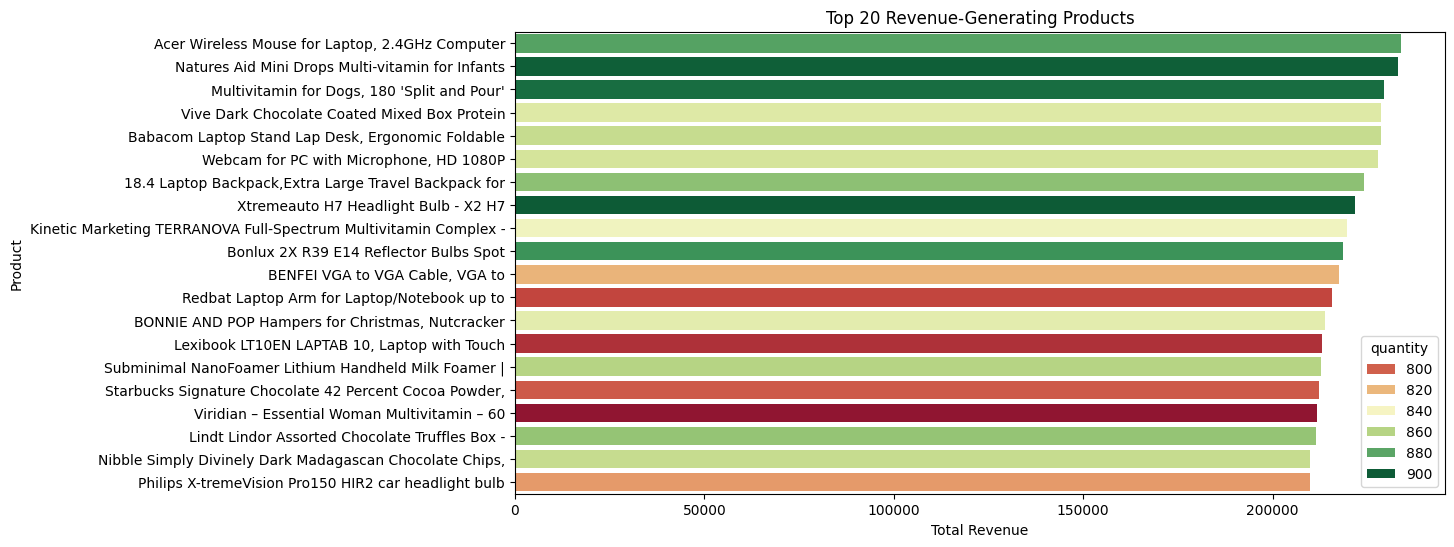

In [15]:
# calculating total revenue and amount of each product sold
product_summary = transactions_df.groupby('short_product_name').agg({
    'total': 'sum',
    'quantity': 'sum'
}).sort_values(by='total', ascending=False)

product_summary.reset_index(inplace=True)
top_20_products = product_summary.head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x='total', y='short_product_name', data=top_20_products, hue='quantity', palette='RdYlGn')
plt.title('Top 20 Revenue-Generating Products')
plt.xlabel('Total Revenue')
plt.ylabel('Product')
plt.show()

here we can see most popelar products, which can be used for promo campaings.

In [16]:
rfm.to_csv('clean_rfm.csv', index=False)